In [78]:
import collections

import pandas
from matplotlib import pyplot as plt
from tqdm import tqdm
from pathlib import Path
import numpy as np
import re

## Figurenhäufigkeit in den Werken

In [2]:
files = list(Path('llpro_output').glob('*'))
files

[PosixPath('llpro_output/DEU073_Schicksale_einer_Seele.txt.tsv'),
 PosixPath('llpro_output/DEU066_Der_Stechlin.txt.tsv'),
 PosixPath('llpro_output/DEU007_Die_Mappe_meines_Urgroßvaters.txt.tsv'),
 PosixPath('llpro_output/DEU039_Problematische_Naturen_Erste_Abtheilung.txt.tsv'),
 PosixPath('llpro_output/DEU045_Witiko.txt.tsv'),
 PosixPath('llpro_output/DEU096_Der_Golem.txt.tsv'),
 PosixPath('llpro_output/DEU011_Soll_und_Haben.txt.tsv'),
 PosixPath('llpro_output/DEU005_Der_Sonnenwirt.txt.tsv'),
 PosixPath('llpro_output/DEU059_Irrungen_Wirrungen.txt.tsv'),
 PosixPath('llpro_output/DEU079_Die_Aufzeichnungen_des_Malte_Laurids_Brigge.txt.tsv'),
 PosixPath('llpro_output/DEU030_Die_verlorene_Handschrift.txt.tsv'),
 PosixPath('llpro_output/DEU094_Der_Weg_ins_Freie.txt.tsv'),
 PosixPath('llpro_output/DEU013_Barfüßele.txt.tsv'),
 PosixPath('llpro_output/DEU061_Größenwahn_ELTeC_ausgabe.txt.tsv'),
 PosixPath('llpro_output/DEU072_Im_alten_Eisen.txt.tsv'),
 PosixPath('llpro_output/DEU097_Wellen.txt.ts

In [3]:
text = files[1]

annotated = pandas.read_csv(text, sep='\t')
annotated.head()

,i,text,orig,is_sent_start,is_para_start,is_section_start,pos,tag,lemma,morph,dep,head,speech,entity,character,coref_clusters,scene_id,scene_label,event_id,event_label
0,0,Im,Im,1,1,1,ADP,APPRART,in,AdpType=Prep|Case=Dat|Gender=Masc|Number=Sing|...,pp,12,_,O,O,_,0,Nonscene,0,stative_event
1,1,Norden,Norden,0,0,0,NOUN,NN,Norden,Case=Dat|Gender=Masc|Number=Sing,pn,0,_,O,O,0,0,Nonscene,0,stative_event
2,2,der,der,0,0,0,DET,ART,der,Case=Gen|Gender=Fem|Number=Sing|PronType=Art,det,3,_,O,O,_,0,Nonscene,0,stative_event
3,3,Grafschaft,Grafschaft,0,0,0,NOUN,NN,Grafschaft,Case=Gen|Gender=Fem|Number=Sing,gmod,1,_,O,O,_,0,Nonscene,0,stative_event
4,4,Ruppin,Ruppin,0,0,0,PROPN,NE,Ruppin,Case=Nom|Gender=*|Number=Sing,app,3,_,B-LOC,O,_,0,Nonscene,0,stative_event


In [29]:
def get_character_freq(annotated):
    character_mentions = []

    cur_character = []
    for id, row in tqdm(annotated.iterrows(), total=len(annotated)):
        if row['character'] == 'B-PER':
            if len(cur_character) > 0:
                character_mentions.append(' '.join(annotated.loc[cur_character, 'text']))
            cur_character = [id]
        if row['character'] == 'I-PER':
            cur_character.append(id)

    char_counter = collections.Counter()
    char_counter.update([character_str for character_str, ids in character_mentions])

    return pandas.DataFrame(char_counter.most_common(), columns=['mention', 'freq'])


In [32]:
output = []

for text in files:
    print(text)
    annotated = pandas.read_csv(text, sep='\t')
    freqs = get_character_freq(annotated)

    freqs = freqs[:100] # 100 häufigsten Figuren
    freqs['filename'] = text.name
    output.append(freqs)

llpro_output/DEU073_Schicksale_einer_Seele.txt.tsv


100%|██████████| 104398/104398 [00:13<00:00, 7821.43it/s] 


llpro_output/DEU066_Der_Stechlin.txt.tsv


100%|██████████| 154597/154597 [00:20<00:00, 7595.70it/s]


llpro_output/DEU007_Die_Mappe_meines_Urgroßvaters.txt.tsv


100%|██████████| 82269/82269 [00:06<00:00, 13508.06it/s]


llpro_output/DEU039_Problematische_Naturen_Erste_Abtheilung.txt.tsv


100%|██████████| 225288/225288 [00:17<00:00, 12907.79it/s]


llpro_output/DEU045_Witiko.txt.tsv


100%|██████████| 338070/338070 [00:30<00:00, 10986.82it/s]


llpro_output/DEU096_Der_Golem.txt.tsv


100%|██████████| 90852/90852 [00:05<00:00, 15655.81it/s]


llpro_output/DEU011_Soll_und_Haben.txt.tsv


100%|██████████| 344302/344302 [00:26<00:00, 13181.21it/s]


llpro_output/DEU005_Der_Sonnenwirt.txt.tsv


100%|██████████| 215012/215012 [00:15<00:00, 13772.10it/s]


llpro_output/DEU059_Irrungen_Wirrungen.txt.tsv


  0%|          | 0/70472 [00:00<?, ?it/s]

llpro_output/DEU079_Die_Aufzeichnungen_des_Malte_Laurids_Brigge.txt.tsv


100%|██████████| 70472/70472 [00:04<00:00, 15663.06it/s]


llpro_output/DEU030_Die_verlorene_Handschrift.txt.tsv


100%|██████████| 307383/307383 [00:26<00:00, 11808.64it/s]


llpro_output/DEU094_Der_Weg_ins_Freie.txt.tsv


100%|██████████| 144741/144741 [00:11<00:00, 12707.05it/s]


llpro_output/DEU013_Barfüßele.txt.tsv


100%|██████████| 74804/74804 [00:05<00:00, 12932.18it/s]


llpro_output/DEU061_Größenwahn_ELTeC_ausgabe.txt.tsv


100%|██████████| 293243/293243 [00:22<00:00, 12874.71it/s]


llpro_output/DEU072_Im_alten_Eisen.txt.tsv


100%|██████████| 64387/64387 [00:04<00:00, 13019.07it/s]


llpro_output/DEU097_Wellen.txt.tsv


100%|██████████| 54751/54751 [00:04<00:00, 11685.87it/s]


llpro_output/DEU038_Der_Hungerpastor.txt.tsv


100%|██████████| 166061/166061 [00:14<00:00, 11826.60it/s]


llpro_output/DEU032_Jürg_Jenatsch.txt.tsv


100%|██████████| 83840/83840 [00:06<00:00, 13584.08it/s]


llpro_output/DEU025_Der_Amerika_Müde.txt.tsv


100%|██████████| 197276/197276 [00:13<00:00, 14124.31it/s]


llpro_output/DEU076_Caspar_Hauser.txt.tsv


100%|██████████| 156609/156609 [00:13<00:00, 11220.56it/s]


In [35]:

pandas.concat(output).to_csv('figurenhäufigkeit.csv', index=False)


## Figurenhäufigkeit/-reihenfolge in den Zusammenfassungen

In [2]:
from flair.models import SequenceTagger

character_tagger = SequenceTagger.load('flair/ner-german-large')

2023-05-25 11:17:48,419 SequenceTagger predicts: Dictionary with 20 tags: <unk>, O, B-PER, E-PER, S-LOC, B-MISC, I-MISC, E-MISC, S-PER, B-ORG, E-ORG, S-ORG, I-ORG, B-LOC, E-LOC, S-MISC, I-PER, I-LOC, <START>, <STOP>


In [3]:
summaries = list(Path('kindler').glob('*'))

In [33]:
from segtok.segmenter import split_single
from flair.data import Sentence

def get_character_freq_from_summary(summary_file):
    summary = open(summary_file).read()
    sentences = [Sentence(sent, use_tokenizer=True) for sent in split_single(summary)]
    character_tagger.predict(sentences)
    character_mentions = []
    for sent in sentences:
        for label in sent.labels:
            if label.value == 'PER':
                # immer nur Vornamen
                character_mentions.append(label.data_point[0].text)
                
    freqs = pandas.DataFrame(collections.Counter(character_mentions).most_common(), columns=['mention', 'freq'])
    freqs['filename'] = summary_file.name
    freqs['occurence_order'] = freqs['mention'].apply(lambda x: character_mentions.index(x)+1)
    return freqs

In [34]:
output = []

for file in tqdm(summaries):
    df = get_character_freq_from_summary(file)
    output.append(df)

100%|██████████| 19/19 [12:32<00:00, 39.60s/it]


In [37]:
pandas.concat(output).to_csv('figurenhäufigkeit_kindler.csv', index=False)

## Auswertung

In [99]:
freq_texts = pandas.read_csv('figurenhäufigkeit.csv', index_col=None)
freq_summaries = pandas.read_csv('figurenhäufigkeit_kindler.csv', index_col=None)
gold = pandas.read_csv('Romanauswahl_Hauptfiguren_Goldstandard.csv', index_col=None, sep=';')

In [114]:
text_mapping = pandas.read_csv('mapping.csv')
text_mapping

,filename,gold_name,filename_kindler
0,DEU039_Problematische_Naturen_Erste_Abtheilung...,Problematische Naturen,Spielhagen_Naturen.txt
1,DEU005_Der_Sonnenwirt.txt.tsv,Der Sonnenwirt,Kurz_Sonnenwirt.txt
2,DEU097_Wellen.txt.tsv,Wellen,Keyserling_Wellen.txt
3,DEU096_Der_Golem.txt.tsv,Der Golem,Meyrink_Golem.txt
4,DEU072_Im_alten_Eisen.txt.tsv,NaN,NaN
5,DEU073_Schicksale_einer_Seele.txt.tsv,Schicksale einer Seele,Dohm_Schicksale.txt
6,DEU025_Der_Amerika_Müde.txt.tsv,Der Amerika-Müde,Kürnberger_Amerika.txt
7,DEU032_Jürg_Jenatsch.txt.tsv,Georg Jenatsch,Meyer_Jenatsch.txt
8,DEU030_Die_verlorene_Handschrift.txt.tsv,Die verlorene Handschrift,Freytag_Handschrift.txt
9,DEU038_Der_Hungerpastor.txt.tsv,Der Hungerpastor,Raabe_Hungerpastor.txt


In [131]:
def predict_by_text_freq(gold_chars, pred_chars):
    for i in range(1, 25):
        retrieved = pred_chars[:i]
        
        # assign retrieved to gold characters
        assignment = {p: None for p in retrieved}
        for p in retrieved:
            for x in gold_chars:
                if p in x:
                    assignment[p] = x
                    break

        precision = len([k for k,v in assignment.items() if v is not None])/len(assignment)
        recall = len(set(x for x in assignment.values() if x is not None)) / len(gold_chars)
        
        yield precision, recall, i


# gold_chars = gold[gold.Titel == 'Der Hungerpastor'].Hauptfiguren_Goldstandard.item().split(', ')
# pred_chars = freq_texts[freq_texts.filename.str.contains('Hungerpastor')].char.tolist()

# pr, rec, thres = np.array(list(zip(*predict_by_text_freq(gold_chars, pred_chars))))
# print(pr, rec, thres)

missing DEU072_Im_alten_Eisen.txt.tsv
missing DEU072_Im_alten_Eisen.txt.tsv
missing DEU072_Im_alten_Eisen.txt.tsv


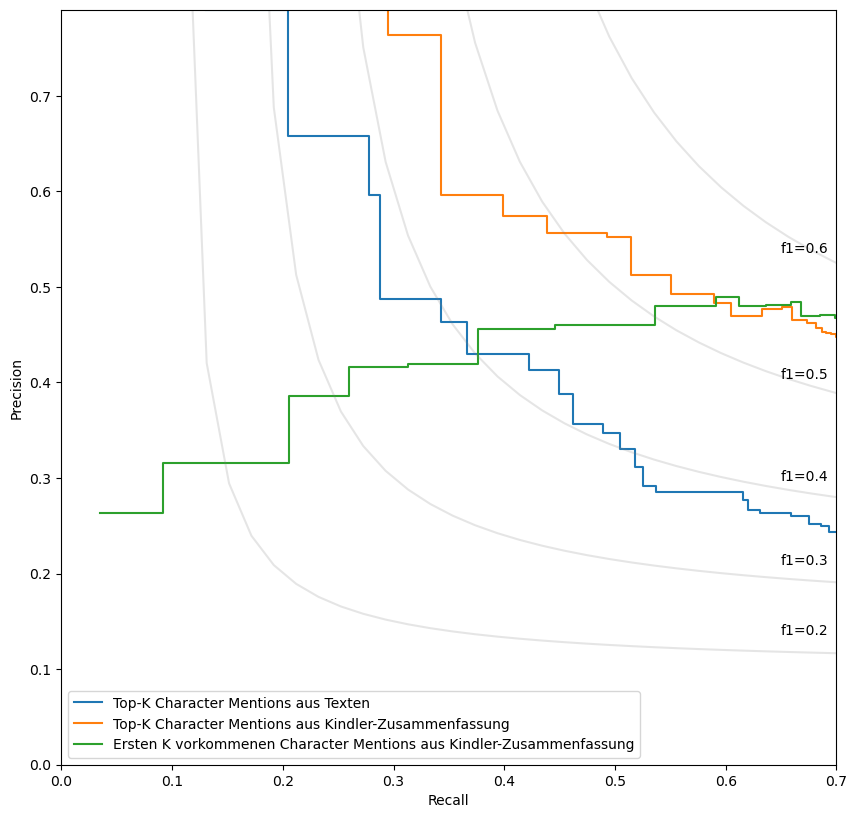

In [187]:
from sklearn.metrics import PrecisionRecallDisplay

fig, ax = plt.subplots(figsize=(10,10), dpi=100)
prs = []
recs = []

for _, row in text_mapping.iterrows():
    gold_chars = gold[gold.Titel == row.gold_name].Hauptfiguren_Goldstandard
    if len(gold_chars) == 0:
        print('missing', row.filename)
        continue
    gold_chars = gold_chars.item().split(', ')
    pred_chars = freq_texts[freq_texts.filename == row.filename].char.tolist()
    
    pr, rec, thres = np.array(list(zip(*predict_by_text_freq(gold_chars, pred_chars))))
    prs.append(pr)
    recs.append(rec)

ax.plot(np.array(recs).mean(axis=0), np.array(prs).mean(axis=0), drawstyle="steps-post", label='Top-K Character Mentions aus Texten')


prs = []
recs = []

for _, row in text_mapping.iterrows():
    gold_chars = gold[gold.Titel == row.gold_name].Hauptfiguren_Goldstandard
    if len(gold_chars) == 0:
        print('missing', row.filename)
        continue
    gold_chars = gold_chars.item().split(', ')
    pred_chars = freq_summaries[freq_summaries.filename == row.filename_kindler].sort_values('freq', ascending=False).mention.tolist()
    
    pr, rec, thres = np.array(list(zip(*predict_by_text_freq(gold_chars, pred_chars))))
    prs.append(pr)
    recs.append(rec)

ax.plot(np.array(recs).mean(axis=0), np.array(prs).mean(axis=0), drawstyle="steps-post", label='Top-K Character Mentions aus Kindler-Zusammenfassung')

prs = []
recs = []

for _, row in text_mapping.iterrows():
    gold_chars = gold[gold.Titel == row.gold_name].Hauptfiguren_Goldstandard
    if len(gold_chars) == 0:
        print('missing', row.filename)
        continue
    gold_chars = gold_chars.item().split(', ')
    pred_chars = freq_summaries[freq_summaries.filename == row.filename_kindler].sort_values('occurence_order', ascending=True).mention.tolist()
    
    pr, rec, thres = np.array(list(zip(*predict_by_text_freq(gold_chars, pred_chars))))
    prs.append(pr)
    recs.append(rec)

ax.plot(np.array(recs).mean(axis=0), np.array(prs).mean(axis=0), drawstyle="steps-post", label='Ersten K vorkommenen Character Mentions aus Kindler-Zusammenfassung')

f_scores = np.linspace(0.2, 0.6, num=5)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = ax.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    ax.annotate("f1={0:0.1f}".format(f_score), xy=(0.65, y[35] + 0.02))
    

ax.set_xlim([0.0, .7])
ax.set_ylim([0.0, .79])
ax.set(xlabel='Recall', ylabel='Precision')
plt.legend()
plt.show()

In [182]:
np.array(recs).mean(axis=0), np.array(prs).mean(axis=0)

(array([0.03529657, 0.09218559, 0.2051523 , 0.25963948, 0.31339567,
        0.37632251, 0.44582829, 0.53594943, 0.59138157, 0.61172088,
        0.63684488, 0.65883605, 0.66760798, 0.68521318, 0.6987698 ,
        0.70355449, 0.70760307, 0.71643634, 0.71643634, 0.71643634,
        0.72048492, 0.72048492, 0.72048492, 0.72048492]),
 array([0.26315789, 0.31578947, 0.38596491, 0.41666667, 0.41929825,
        0.45614035, 0.45989975, 0.47963659, 0.48913952, 0.48036759,
        0.48132452, 0.48371687, 0.46954683, 0.4701252 , 0.46711768,
        0.46251241, 0.46096443, 0.46285641, 0.46454924, 0.46108664,
        0.46046007, 0.45863733, 0.45697309, 0.45544754]))